In [0]:
# Import the relevant modules
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
# Load the data
data = load_breast_cancer()

In [3]:
# Check data properties
print("Type:", type(data))

Type: <class 'sklearn.utils.Bunch'>


In [4]:
print("Keys:", data.keys()) # Shows the keys of the data
print("Shape:", data.data.shape) # Check the shape of X
print("Targets:", data.target.shape) # Check the shape of Y
print("Feature Names:", data.feature_names) # Print the input feature names
print("Targets Names:", data.target_names)

Keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape: (569, 30)
Targets: (569,)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets Names: ['malignant' 'benign']


In [0]:
# We split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [0]:
# We scale the data
# StandardScaler is used for normalizing the data
# This is to prevent inputs from having very different ranges

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [0]:
# We build the model
# Sigmoid to make sure the output is 0/1 

model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [0]:
# Loss and optimizer

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [0]:
# We convert the data into Torch Tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

# Targets are reshaped to be 2D arrays of shape Nx1
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [10]:
# Train the model
number_epochs = 2000
train_losses = np.zeros(number_epochs)
test_losses = np.zeros(number_epochs)

for iteration in range(number_epochs):

    # We train the model
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # We are also interested in the test/validation loss, to make sure we are not overtiffing
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    # We save the losses
    train_losses[iteration] = loss.item()
    test_losses[iteration] = loss_test.item()

    if (iteration+1) % 50 == 0:
        print("Epoch: {}/{}, Train Loss: {}, Test Loss: {}".format(iteration+1, number_epochs, loss.item(), loss_test.item()))

Epoch: 50/2000, Train Loss: 0.5151282548904419, Test Loss: 0.5410593152046204
Epoch: 100/2000, Train Loss: 0.37863510847091675, Test Loss: 0.4040481150150299
Epoch: 150/2000, Train Loss: 0.30400705337524414, Test Loss: 0.3288499116897583
Epoch: 200/2000, Train Loss: 0.2570175528526306, Test Loss: 0.28020861744880676
Epoch: 250/2000, Train Loss: 0.224765345454216, Test Loss: 0.24568858742713928
Epoch: 300/2000, Train Loss: 0.20135153830051422, Test Loss: 0.2198081761598587
Epoch: 350/2000, Train Loss: 0.1836446076631546, Test Loss: 0.199682354927063
Epoch: 400/2000, Train Loss: 0.16980843245983124, Test Loss: 0.18358883261680603
Epoch: 450/2000, Train Loss: 0.15869979560375214, Test Loss: 0.17042015492916107
Epoch: 500/2000, Train Loss: 0.1495768427848816, Test Loss: 0.15943391621112823
Epoch: 550/2000, Train Loss: 0.1419408768415451, Test Loss: 0.15011689066886902
Epoch: 600/2000, Train Loss: 0.13544589281082153, Test Loss: 0.1421051025390625
Epoch: 650/2000, Train Loss: 0.129845172166

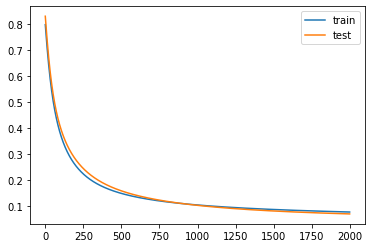

In [13]:
# Plot the train and test losses
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.show()

In [12]:
# Get the accuracy
with torch.no_grad():
    p_train = model(X_train) # Calculate the prediction
    p_train = np.round(p_train.numpy()) # convert tensors to np, and round them
    train_accuracy = np.mean(y_train.numpy() == p_train) # point-wise comparison and take the mean

    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_accuracy = np.mean(y_test.numpy() == p_test)

print('Train Accuracy: {}, Test Accuracy: {}'.format(train_accuracy, test_accuracy))

Train Accuracy: 0.984251968503937, Test Accuracy: 0.9840425531914894


In [14]:
# Look at the state dict
# This is an ordered dictionary containing the parameters of the model

model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5540, -0.5192, -0.5583, -0.4297, -0.2524,  0.0057, -0.5746, -0.4578,
                       -0.0812,  0.5994, -0.4889,  0.0191, -0.6394, -0.4460, -0.2235,  0.3529,
                        0.1493, -0.2039,  0.2449,  0.6609, -0.4673, -0.5579, -0.4269, -0.4084,
                       -0.3644, -0.2995, -0.6204, -0.5166, -0.5156, -0.3807]])),
             ('0.bias', tensor([0.3738]))])

In [0]:
# Save the model
torch.save(model.state_dict(), 'LinearClassification.pt')

In [17]:
# Load the model
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

model2.load_state_dict(torch.load('LinearClassification.pt'))

<All keys matched successfully>

In [18]:
# Evaluate the model
with torch.no_grad():
    p_train = model2(X_train) # Calculate the prediction
    p_train = np.round(p_train.numpy()) # convert tensors to np, and round them
    train_accuracy = np.mean(y_train.numpy() == p_train) # point-wise comparison and take the mean

    p_test = model2(X_test)
    p_test = np.round(p_test.numpy())
    test_accuracy = np.mean(y_test.numpy() == p_test)

print('Train Accuracy: {}, Test Accuracy: {}'.format(train_accuracy, test_accuracy))

Train Accuracy: 0.984251968503937, Test Accuracy: 0.9840425531914894
